**Questão 10**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = "cameraman.png" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Lê a imagem em escala de cinza 

# Sigma controla o quanto a imagem será suavizada.
sigmas = [0.5, 1, 2]  # Quanto maior o valor de sigma, mais borrada a imagem ficará.

# Aplica o filtro Gaussiano 5x5 nas imagens. Para cada valor de sigma, gera uma imagem suavizada diferente
imgs_blurred = [cv2.GaussianBlur(img, (5,5), sigmaX=s, sigmaY=s) for s in sigmas]

# Parâmetros do detector de bordas de Canny
low_thresh = 50 #limite inferior para detectar uma borda
high_thresh = 150 #limite superior para confirmar uma borda

# Aplica o detector de bordas de Canny em cada imagem suavizada
# As mesmas configurações de low_thresh e high_thresh são usadas para todas as imagens
edges = [cv2.Canny(im, low_thresh, high_thresh) for im in imgs_blurred]

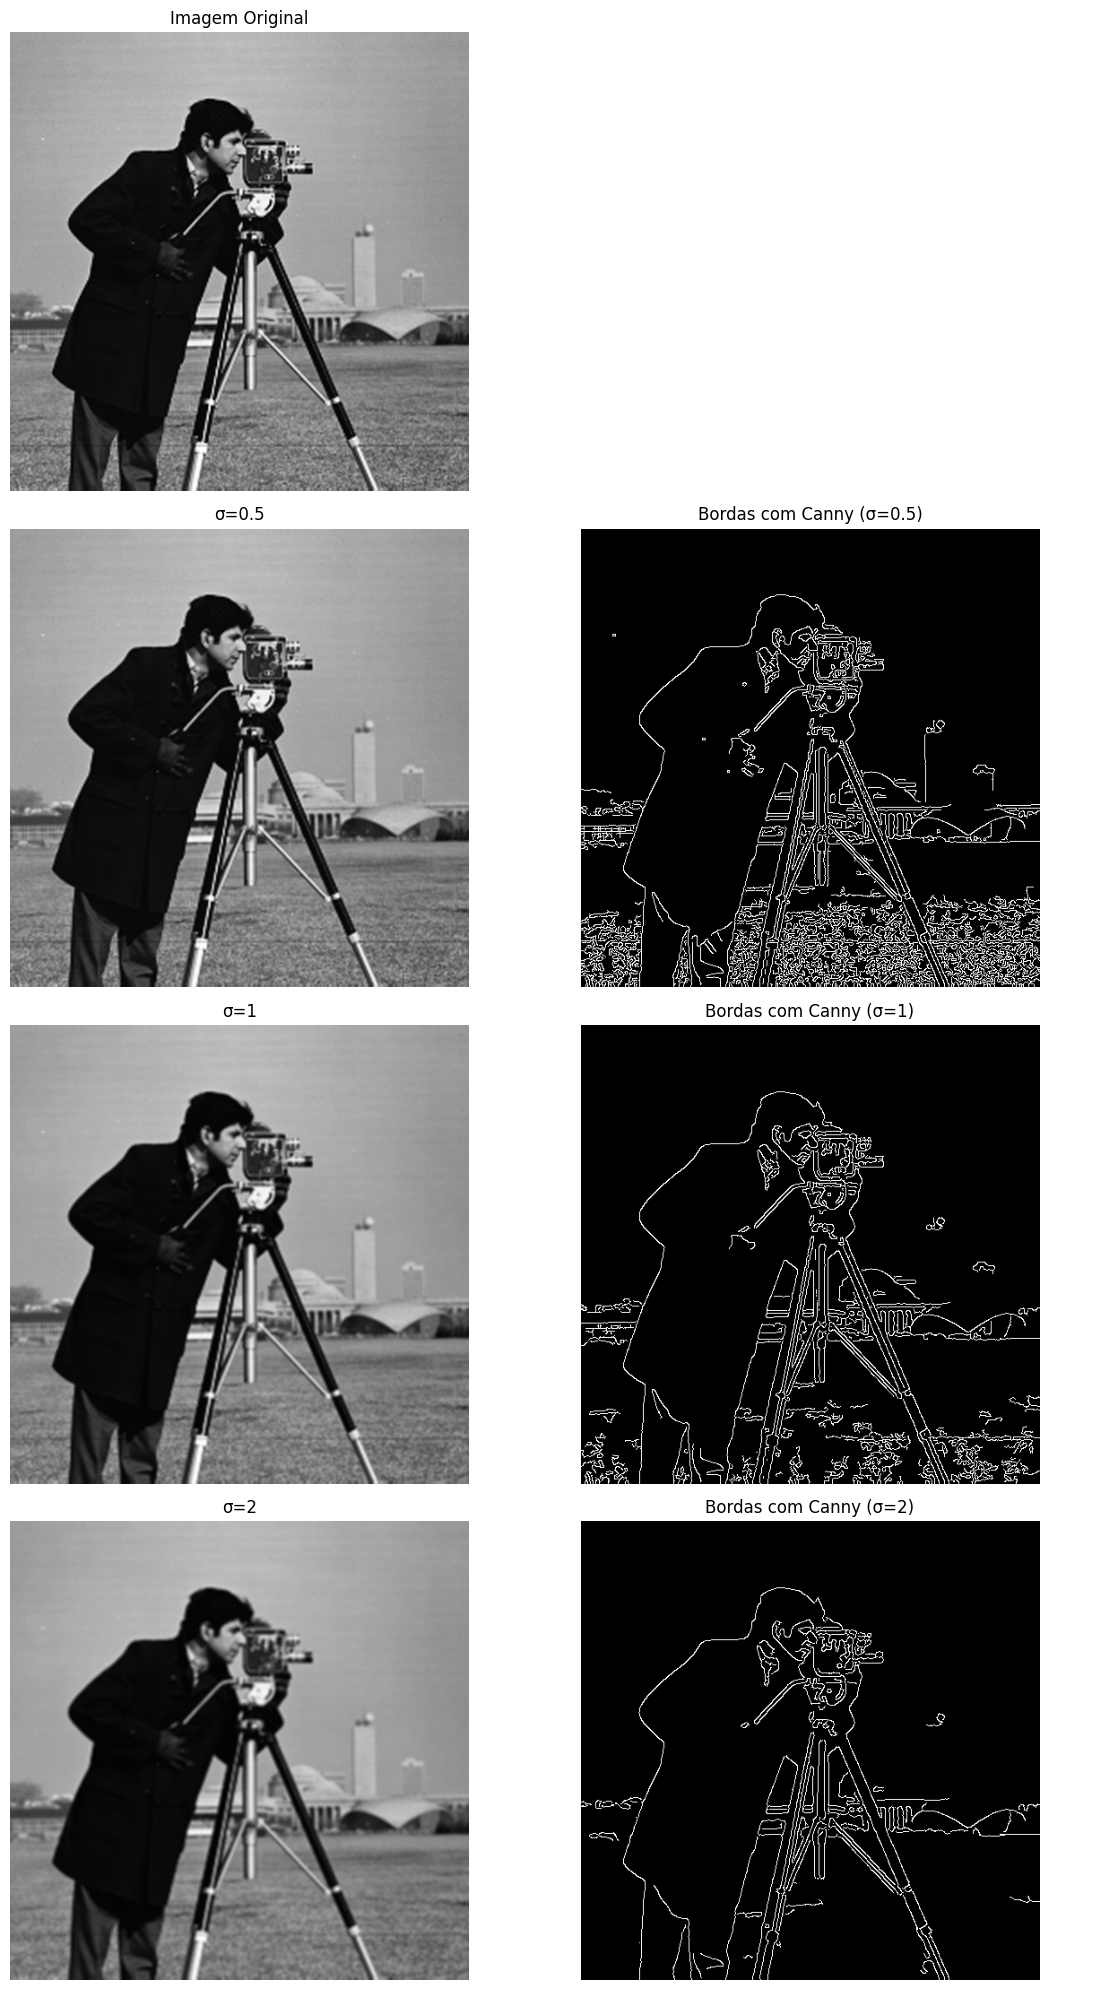

In [276]:
# Exibição das imagens geradas
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title("Imagem Original")
axs[0, 0].axis('off')
axs[0, 1].axis('off')  # célula vazia

# Mostrar imagens suavizadas + bordas detectadas para cada sigma
for idx, (sigma, img_b, edge_img) in enumerate(zip(sigmas, imgs_blurred, edges)):
    axs[idx+1, 0].imshow(img_b, cmap='gray')
    axs[idx+1, 0].set_title(f"σ={sigma}")
    axs[idx+1, 0].axis('off')

    axs[idx+1, 1].imshow(edge_img, cmap='gray')
    axs[idx+1, 1].set_title(f"Bordas com Canny (σ={sigma})")
    axs[idx+1, 1].axis('off')

plt.tight_layout()
plt.show()
